
# 📊 M4.4 圖形美化技巧

本課程專注於數據可視化的美化和專業呈現技巧。一個好的數據可視化不僅要準確展示數據，還需要美觀、清晰和專業。我們將學習如何通過顏色、標籤、註釋和排版等方面的調整，提升圖表的視覺效果和可讀性，使圖表達到專業出版品質。


## 🎯 教學目標

- 🎨 掌握圖表美化的核心原則和最佳實踐
- 📝 學習添加專業標籤、標題和註釋的技巧
- 🖌️ 探索色彩運用和主題定製方法
- 📊 掌握排版與佈局調整技巧

In [3]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import warnings

# 忽略警告信息
warnings.filterwarnings('ignore')

# 設置隨機種子確保結果可重現
np.random.seed(42)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 📊 1. 顏色與樣式美化

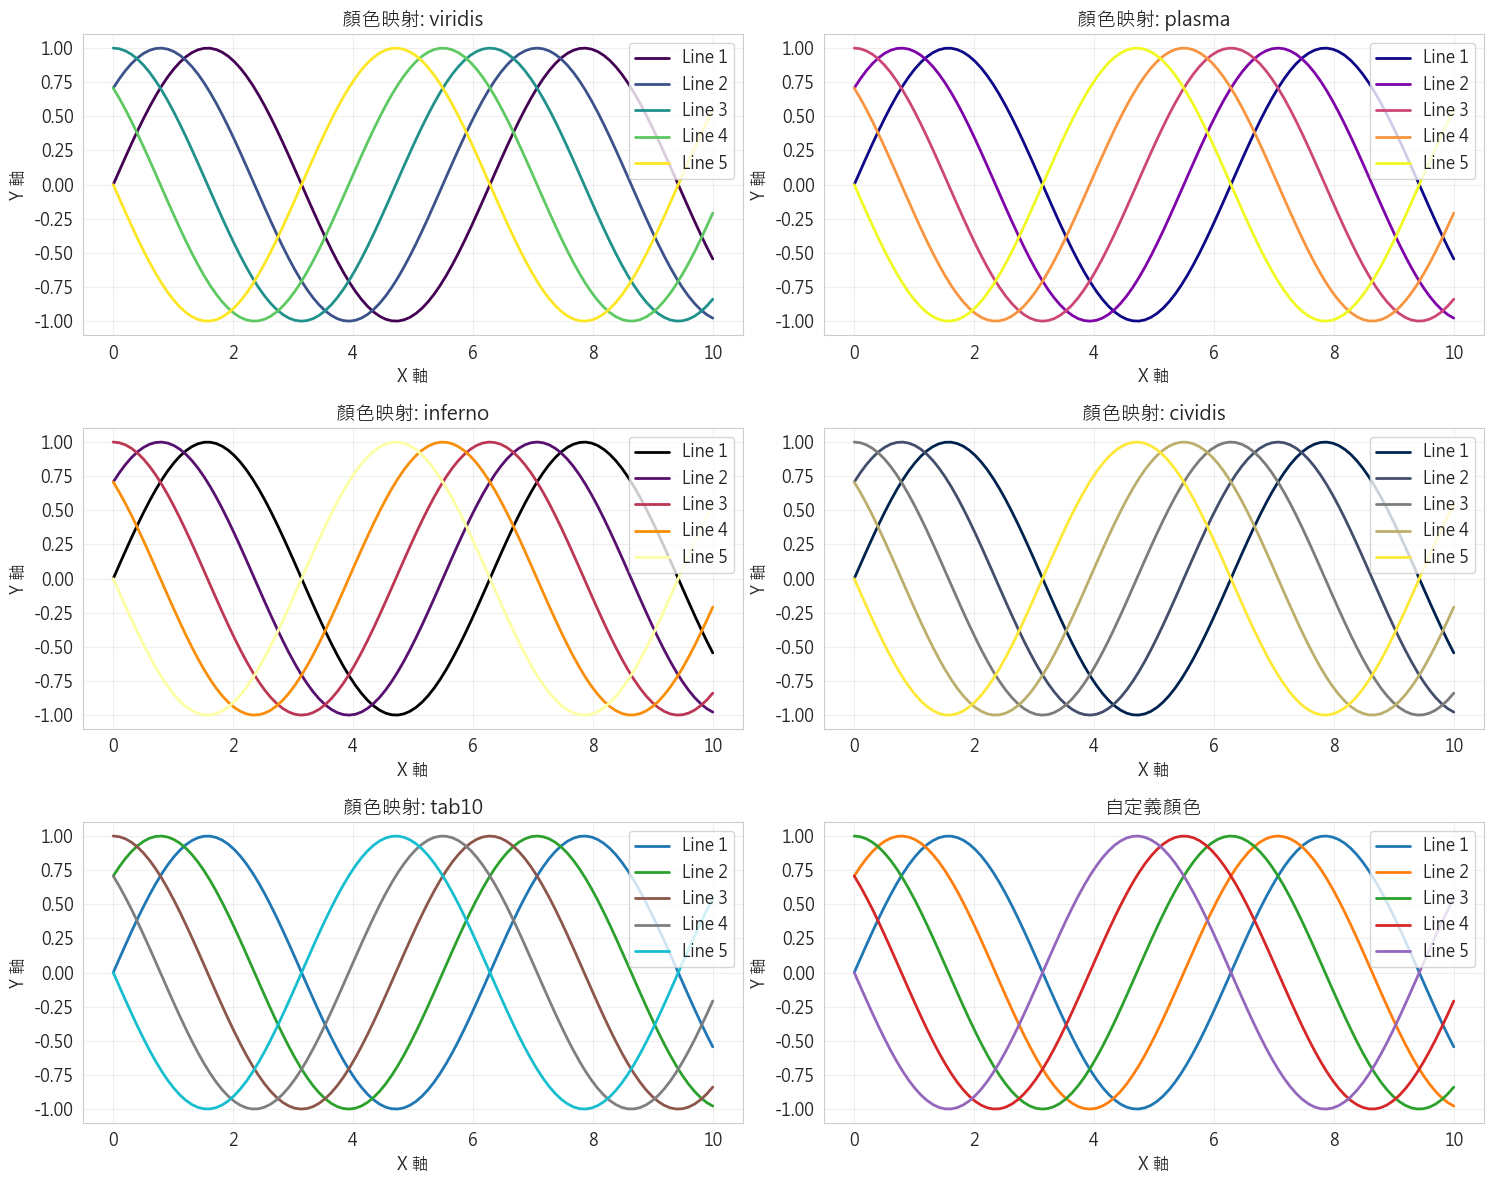

In [5]:
# 1.1 顏色映射與配色方案

# 創建示例數據
x = np.linspace(0, 10, 100)
y_values = [np.sin(x + i*np.pi/4) for i in range(5)]

# 使用不同的顏色映射
color_maps = ['viridis', 'plasma', 'inferno', 'cividis', 'tab10']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# 展示不同顏色映射
for i, cmap_name in enumerate(color_maps):
    if i < 5:
        cmap = plt.cm.get_cmap(cmap_name)
        colors = [cmap(j/4) for j in range(5)]
        
        for j in range(5):
            axes[i].plot(x, y_values[j], color=colors[j], linewidth=2, 
                       label=f'Line {j+1}')
        
        axes[i].set_title(f'顏色映射: {cmap_name}', fontsize=14)
        axes[i].set_xlabel('X 軸', fontsize=12)
        axes[i].set_ylabel('Y 軸', fontsize=12)
        axes[i].legend(loc='upper right')
        axes[i].grid(True, alpha=0.3)

# 展示自定義顏色
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for j in range(5):
    axes[5].plot(x, y_values[j], color=custom_colors[j], linewidth=2, 
               label=f'Line {j+1}')

axes[5].set_title('自定義顏色', fontsize=14)
axes[5].set_xlabel('X 軸', fontsize=12)
axes[5].set_ylabel('Y 軸', fontsize=12)
axes[5].legend(loc='upper right')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

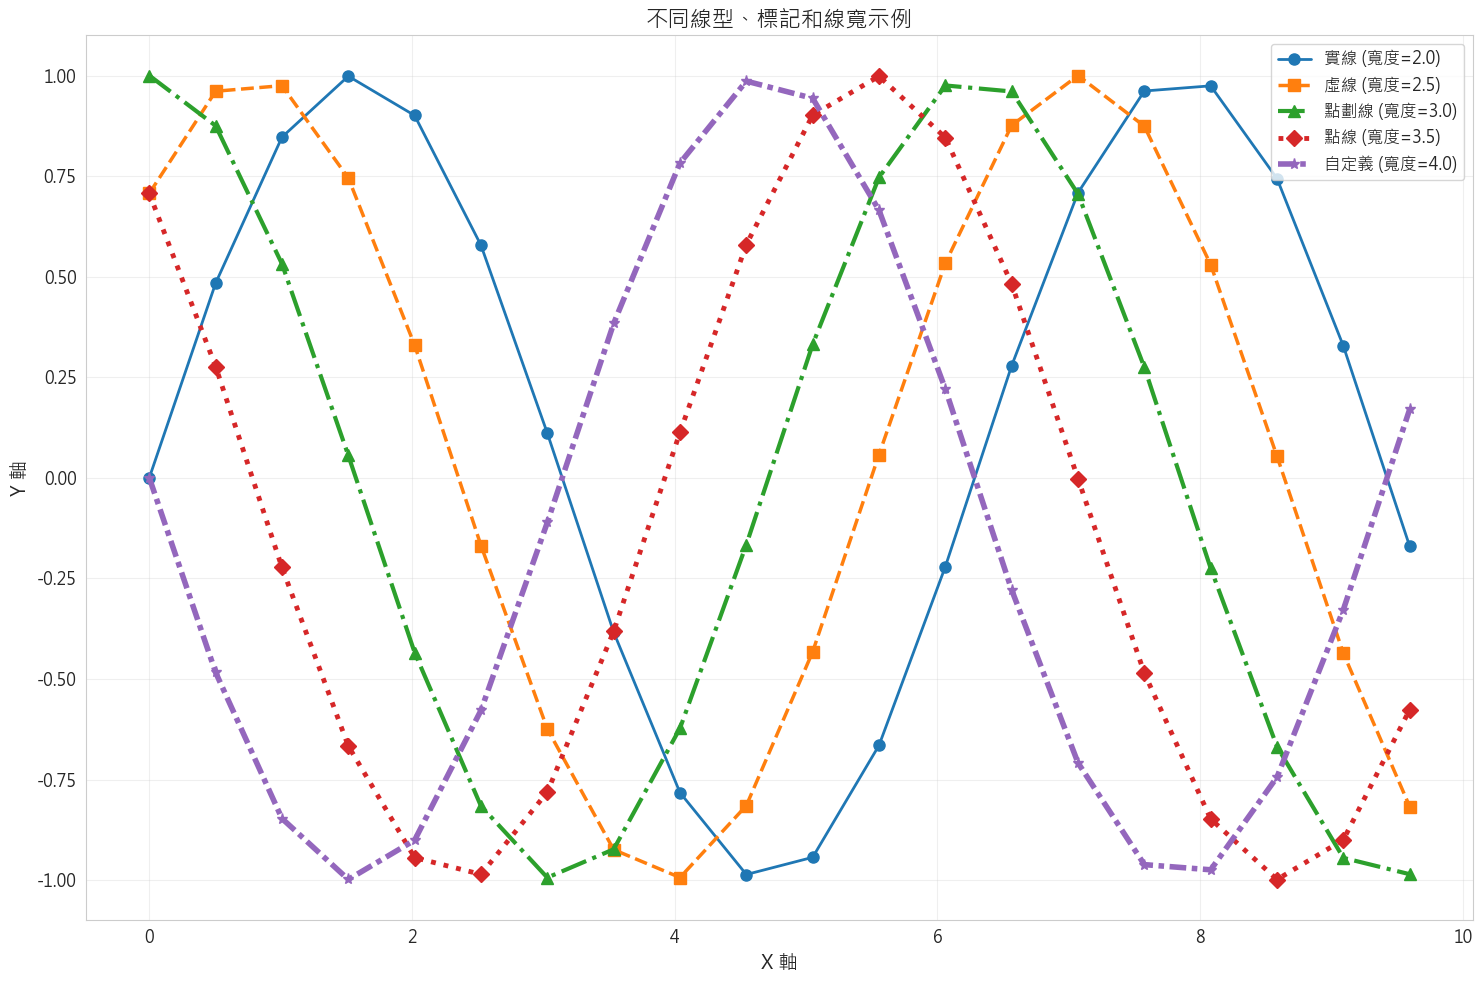

In [6]:
# 1.2 線型、標記與線寬

# 線型選項
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
line_style_names = ['實線', '虛線', '點劃線', '點線', '自定義']

# 標記選項
markers = ['o', 's', '^', 'D', '*']
marker_names = ['圓形', '方形', '三角形', '菱形', '星形']

plt.figure(figsize=(15, 10))

# 展示線型
for i, (style, name) in enumerate(zip(line_styles, line_style_names)):
    plt.plot(x[::5], y_values[i][::5], linestyle=style, linewidth=2+i/2, 
             marker=markers[i], markersize=8, label=f'{name} (寬度={2+i/2:.1f})')

plt.title('不同線型、標記和線寬示例', fontsize=16)
plt.xlabel('X 軸', fontsize=14)
plt.ylabel('Y 軸', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

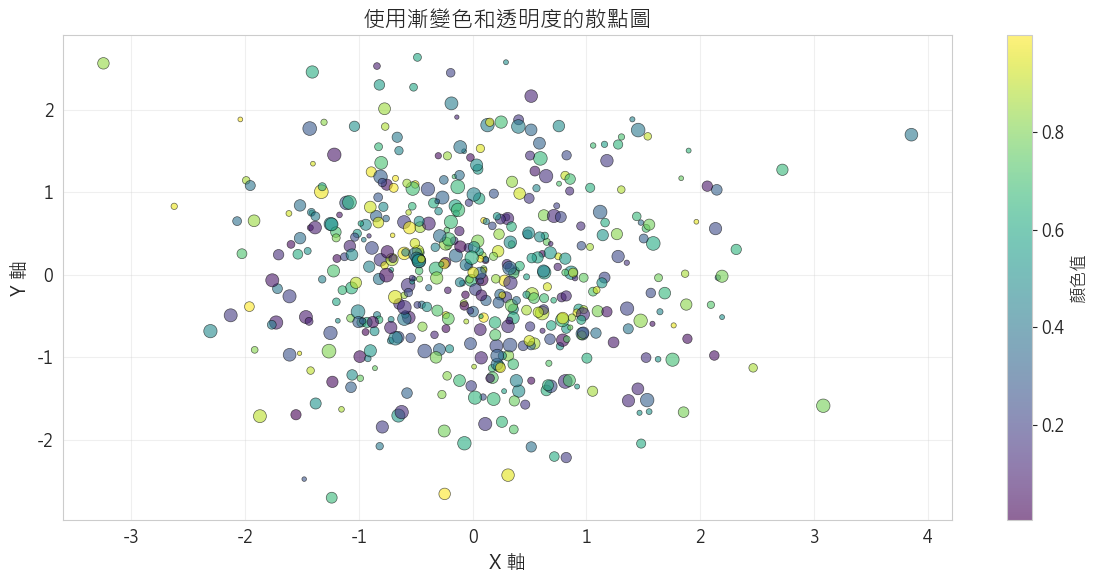

In [7]:
# 1.3 漸變色和透明度

# 創建散點圖數據
n = 500
x_scatter = np.random.randn(n)
y_scatter = np.random.randn(n)
colors = np.random.rand(n)
sizes = np.random.randint(10, 100, n)

plt.figure(figsize=(12, 6))

# 使用漸變色和透明度
scatter = plt.scatter(x_scatter, y_scatter, c=colors, s=sizes, alpha=0.6, 
                     cmap='viridis', edgecolor='black', linewidth=0.5)

plt.colorbar(scatter, label='顏色值')
plt.title('使用漸變色和透明度的散點圖', fontsize=16)
plt.xlabel('X 軸', fontsize=14)
plt.ylabel('Y 軸', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 📊 2. 標籤與標註專業化

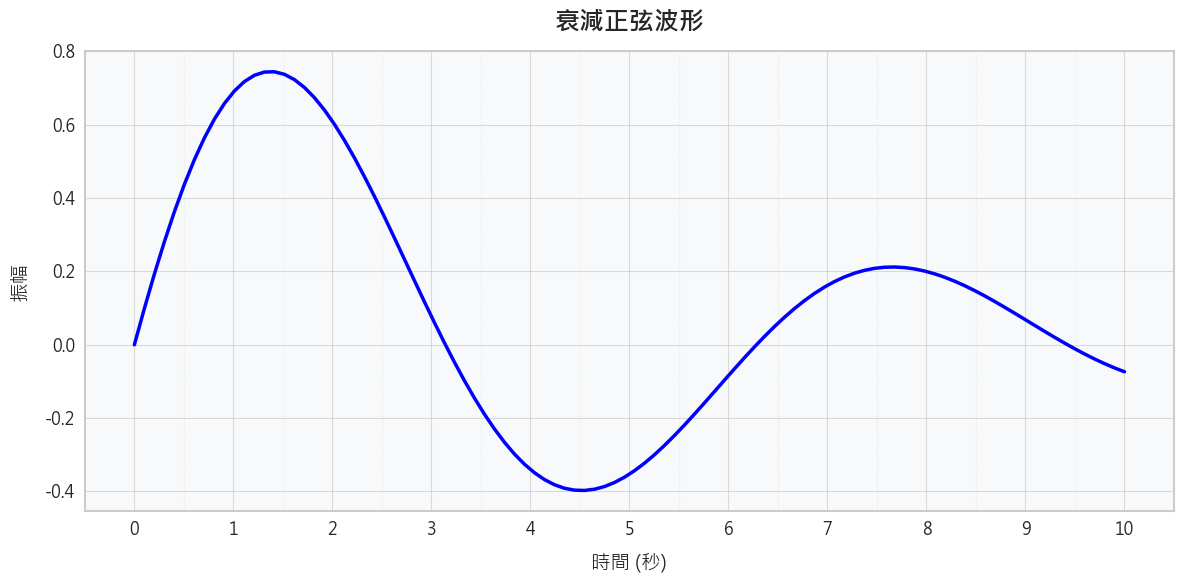

In [8]:
# 2.1 標題、軸標籤與刻度美化

# 創建示例數據
x = np.linspace(0, 10, 100)
y = np.sin(x) * np.exp(-x/5)

fig, ax = plt.subplots(figsize=(12, 6))

# 繪製基本曲線
ax.plot(x, y, 'b-', linewidth=2.5)

# 美化標題和標籤
ax.set_title('衰減正弦波形', fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel('時間 (秒)', fontsize=14, labelpad=10)
ax.set_ylabel('振幅', fontsize=14, labelpad=10)

# 美化刻度
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# 添加網格
ax.grid(True, which='major', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', linestyle=':', alpha=0.4)

# 添加邊框
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# 設置背景顏色
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

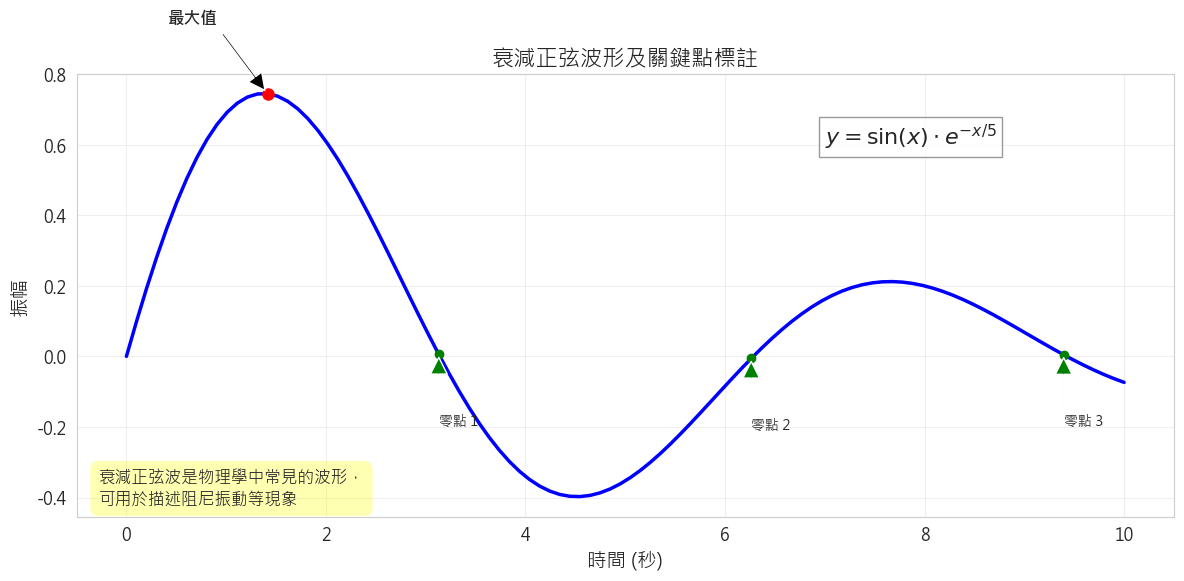

In [9]:
# 2.2 註釋和文本標註

fig, ax = plt.subplots(figsize=(12, 6))

# 繪製基本曲線
ax.plot(x, y, 'b-', linewidth=2.5)

# 找到最大值和零點
max_idx = np.argmax(y)
max_x, max_y = x[max_idx], y[max_idx]

zero_crossings = np.where(np.diff(np.signbit(y)))[0]
zero_x = [x[i] for i in zero_crossings]
zero_y = [y[i] for i in zero_crossings]

# 添加最大值標註
ax.plot(max_x, max_y, 'ro', markersize=8)
ax.annotate('最大值', xy=(max_x, max_y), xytext=(max_x-1, max_y+0.2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=12, fontweight='bold')

# 添加零點標註
for i, (zx, zy) in enumerate(zip(zero_x, zero_y)):
    if i < 3:  # 只標註前三個零點
        ax.plot(zx, zy, 'go', markersize=6)
        ax.annotate(f'零點 {i+1}', xy=(zx, zy), xytext=(zx, zy-0.2),
                   arrowprops=dict(facecolor='green', shrink=0.05, width=1),
                   fontsize=10)

# 添加公式文本
ax.text(7, 0.6, r'$y = \sin(x) \cdot e^{-x/5}$',
        fontsize=16, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# 添加描述性文本
ax.text(0.02, 0.02, '衰減正弦波是物理學中常見的波形，\n可用於描述阻尼振動等現象',
       transform=ax.transAxes, fontsize=12, verticalalignment='bottom',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

# 基本圖表設置
ax.set_title('衰減正弦波形及關鍵點標註', fontsize=16)
ax.set_xlabel('時間 (秒)', fontsize=14)
ax.set_ylabel('振幅', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

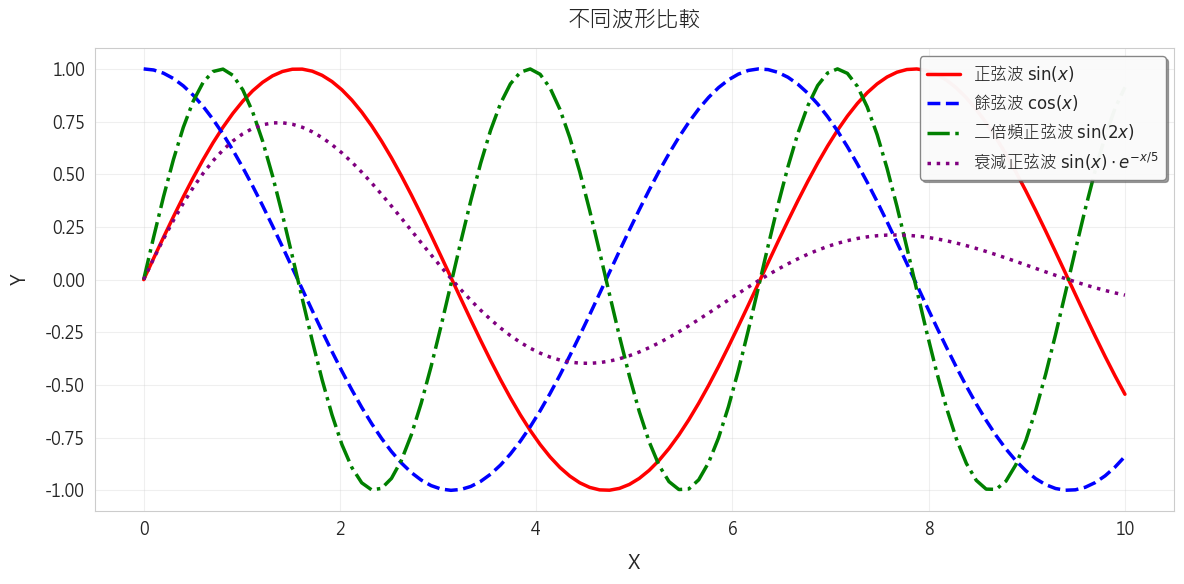

In [10]:
# 2.3 圖例美化和定位

# 創建多條曲線
fig, ax = plt.subplots(figsize=(12, 6))

curves = [
    (np.sin(x), 'red', '-', '正弦波 $\sin(x)$'),
    (np.cos(x), 'blue', '--', '餘弦波 $\cos(x)$'),
    (np.sin(2*x), 'green', '-.', '二倍頻正弦波 $\sin(2x)$'),
    (np.sin(x) * np.exp(-x/5), 'purple', ':', '衰減正弦波 $\sin(x) \cdot e^{-x/5}$')
]

for curve_y, color, style, label in curves:
    ax.plot(x, curve_y, color=color, linestyle=style, linewidth=2.5, label=label)

# 美化圖例
legend = ax.legend(loc='upper right', fontsize=12, frameon=True, 
                  framealpha=0.95, edgecolor='gray', fancybox=True, shadow=True)

# 美化標題和軸標籤
ax.set_title('不同波形比較', fontsize=16, pad=15)
ax.set_xlabel('X', fontsize=14, labelpad=10)
ax.set_ylabel('Y', fontsize=14, labelpad=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 📊 3. 專業排版與佈局

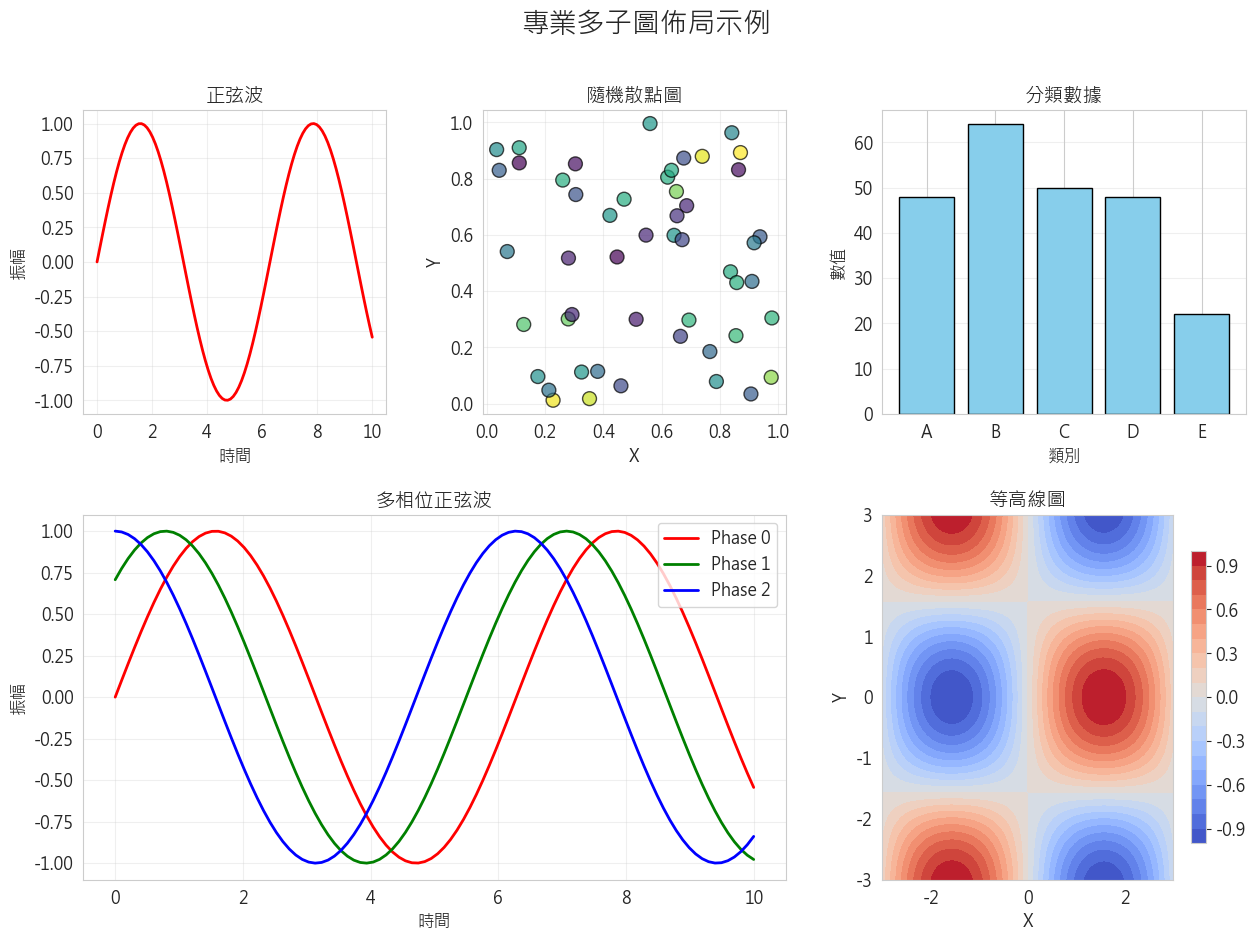

In [12]:
# 3.1 子圖間距與對齊

# 創建複雜的多子圖佈局
fig = plt.figure(figsize=(15, 10))

# 使用GridSpec進行精確的佈局控制
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 3, width_ratios=[1, 1, 1.2], height_ratios=[1, 1.2],
              wspace=0.3, hspace=0.3)

# 子圖1: 線圖
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, np.sin(x), 'r-', linewidth=2)
ax1.set_title('正弦波', fontsize=14)
ax1.set_xlabel('時間', fontsize=12)
ax1.set_ylabel('振幅', fontsize=12)
ax1.grid(True, alpha=0.3)

# 子圖2: 散點圖
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(np.random.rand(50), np.random.rand(50), s=100, alpha=0.7,
           c=np.random.rand(50), cmap='viridis', edgecolor='black')
ax2.set_title('隨機散點圖', fontsize=14)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.grid(True, alpha=0.3)

# 子圖3: 長條圖
ax3 = fig.add_subplot(gs[0, 2])
categories = ['A', 'B', 'C', 'D', 'E']
values = np.random.randint(10, 100, 5)
ax3.bar(categories, values, color='skyblue', edgecolor='black')
ax3.set_title('分類數據', fontsize=14)
ax3.set_xlabel('類別', fontsize=12)
ax3.set_ylabel('數值', fontsize=12)
ax3.grid(True, axis='y', alpha=0.3)

# 子圖4: 多線圖
ax4 = fig.add_subplot(gs[1, :2])
for i, color in enumerate(['r', 'g', 'b']):
    ax4.plot(x, np.sin(x + i*np.pi/4), color=color, linewidth=2, 
             label=f'Phase {i}')
ax4.set_title('多相位正弦波', fontsize=14)
ax4.set_xlabel('時間', fontsize=12)
ax4.set_ylabel('振幅', fontsize=12)
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

# 子圖5: 等高線圖
ax5 = fig.add_subplot(gs[1, 2])
x_grid, y_grid = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z_grid = np.sin(x_grid) * np.cos(y_grid)
contour = ax5.contourf(x_grid, y_grid, z_grid, 20, cmap='coolwarm')
fig.colorbar(contour, ax=ax5, shrink=0.8)
ax5.set_title('等高線圖', fontsize=14)
ax5.set_xlabel('X', fontsize=12)
ax5.set_ylabel('Y', fontsize=12)

# 添加總標題
fig.suptitle('專業多子圖佈局示例', fontsize=20, y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 為總標題留出空間
plt.show()

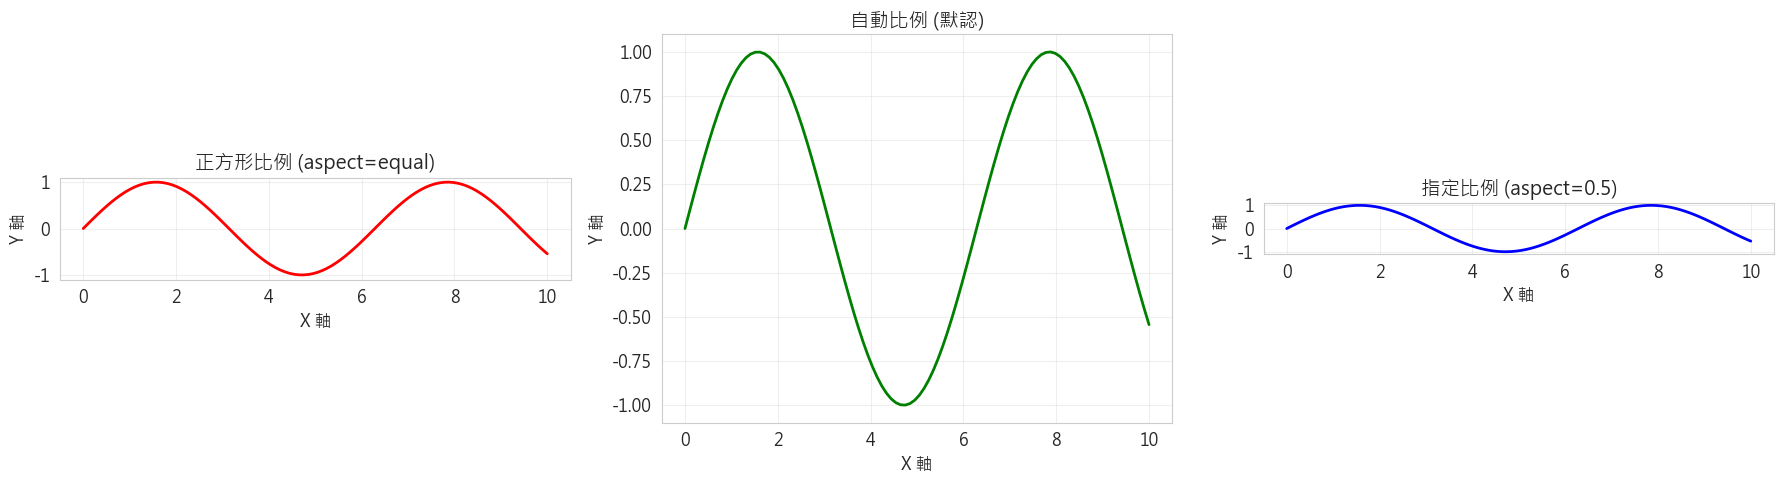

In [13]:
# 3.2 圖表尺寸與比例

# 展示不同尺寸和比例的效果
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 正方形比例
axes[0].set_aspect('equal')
axes[0].plot(x, np.sin(x), 'r-', linewidth=2)
axes[0].set_title('正方形比例 (aspect=equal)', fontsize=14)
axes[0].set_xlabel('X 軸', fontsize=12)
axes[0].set_ylabel('Y 軸', fontsize=12)
axes[0].grid(True, alpha=0.3)

# 自動比例 (默認)
axes[1].plot(x, np.sin(x), 'g-', linewidth=2)
axes[1].set_title('自動比例 (默認)', fontsize=14)
axes[1].set_xlabel('X 軸', fontsize=12)
axes[1].set_ylabel('Y 軸', fontsize=12)
axes[1].grid(True, alpha=0.3)

# 指定比例
axes[2].set_aspect(0.5)
axes[2].plot(x, np.sin(x), 'b-', linewidth=2)
axes[2].set_title('指定比例 (aspect=0.5)', fontsize=14)
axes[2].set_xlabel('X 軸', fontsize=12)
axes[2].set_ylabel('Y 軸', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

以下是保存圖表至不同格式與分辨率的命令示例:
plt.savefig('my_figure.png', format='png', dpi=72, bbox_inches='tight')
plt.savefig('my_figure.png', format='png', dpi=150, bbox_inches='tight')
plt.savefig('my_figure.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('my_figure.jpg', format='jpg', dpi=72, bbox_inches='tight')
plt.savefig('my_figure.jpg', format='jpg', dpi=150, bbox_inches='tight')
plt.savefig('my_figure.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.savefig('my_figure.svg', format='svg', dpi=72, bbox_inches='tight')
plt.savefig('my_figure.svg', format='svg', dpi=150, bbox_inches='tight')
plt.savefig('my_figure.svg', format='svg', dpi=300, bbox_inches='tight')
plt.savefig('my_figure.pdf', format='pdf', dpi=72, bbox_inches='tight')
plt.savefig('my_figure.pdf', format='pdf', dpi=150, bbox_inches='tight')
plt.savefig('my_figure.pdf', format='pdf', dpi=300, bbox_inches='tight')


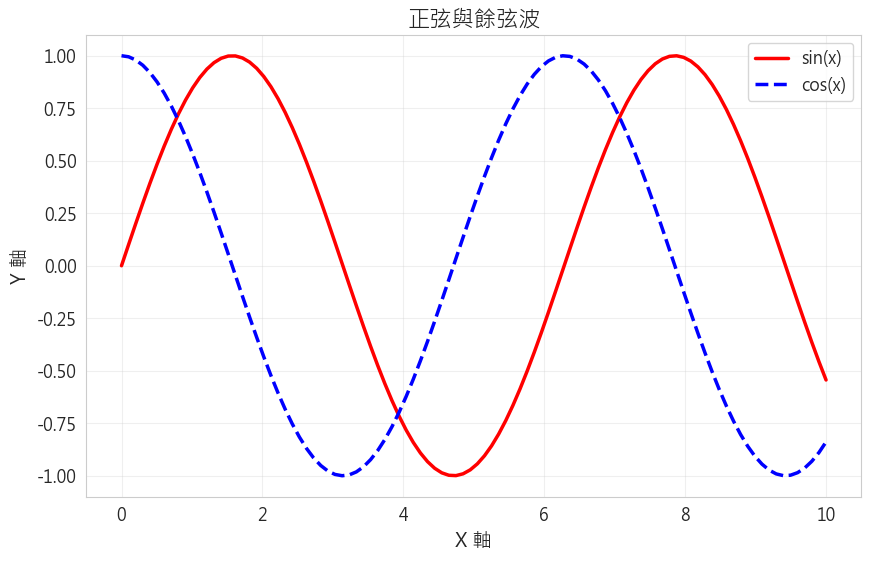

In [14]:
# 3.3 保存為不同格式與分辨率

# 創建一個示例圖表用於展示不同保存格式
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, np.sin(x), 'r-', linewidth=2.5, label='sin(x)')
ax.plot(x, np.cos(x), 'b--', linewidth=2.5, label='cos(x)')
ax.set_title('正弦與餘弦波', fontsize=16)
ax.set_xlabel('X 軸', fontsize=14)
ax.set_ylabel('Y 軸', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# 保存為不同格式
formats = ['png', 'jpg', 'svg', 'pdf']
dpis = [72, 150, 300]

# 顯示保存命令 (不實際保存)
print("以下是保存圖表至不同格式與分辨率的命令示例:")
for fmt in formats:
    for dpi in dpis:
        print(f"plt.savefig('my_figure.{fmt}', format='{fmt}', dpi={dpi}, bbox_inches='tight')")

plt.show()


## 📊 4. 色彩心理學與專業配色

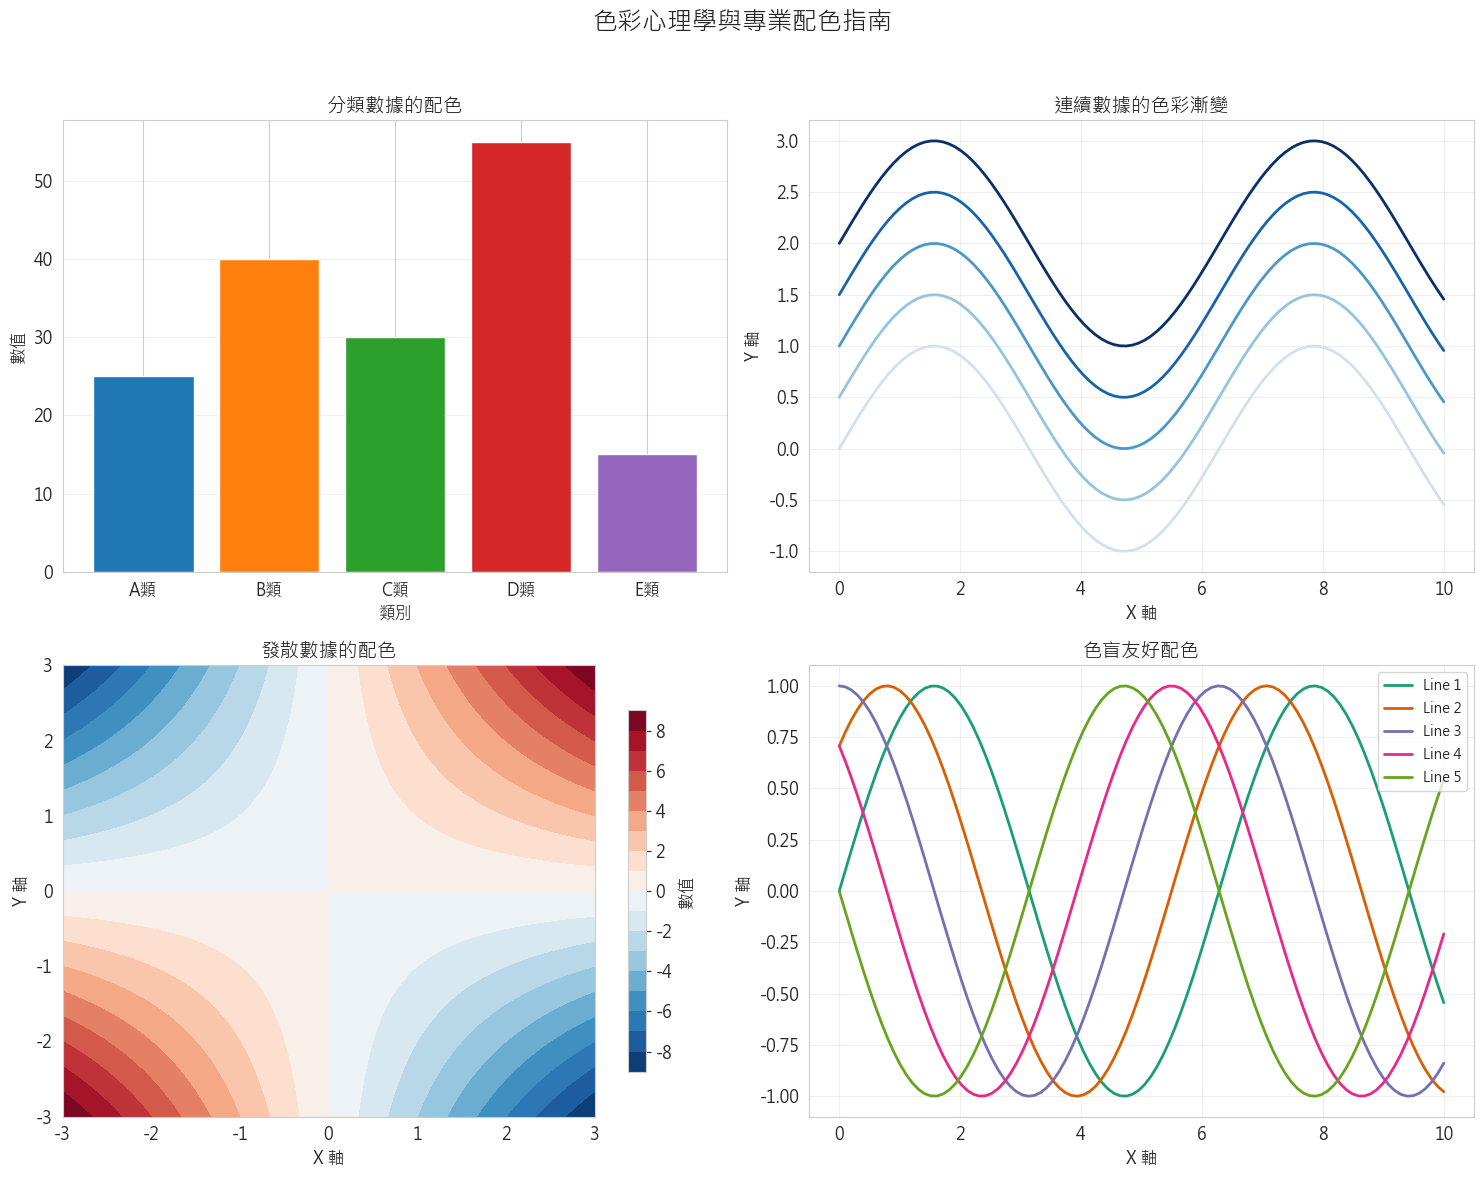

In [16]:
# 4.1 為不同類型的數據選擇合適的顏色

# 創建多類型圖表，展示合適的配色
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 類別數據配色 (使用分類調色板)
categories = ['A類', 'B類', 'C類', 'D類', 'E類']
values = [25, 40, 30, 55, 15]
categorical_colors = sns.color_palette("tab10")
axes[0, 0].bar(categories, values, color=categorical_colors)
axes[0, 0].set_title('分類數據的配色', fontsize=14)
axes[0, 0].set_xlabel('類別', fontsize=12)
axes[0, 0].set_ylabel('數值', fontsize=12)
axes[0, 0].grid(True, axis='y', alpha=0.3)

# 2. 連續數據配色 (使用順序調色板)
x_cont = np.linspace(0, 10, 100)
for i, alpha in enumerate(np.linspace(0.2, 1.0, 5)):
    axes[0, 1].plot(x_cont, i*0.5 + np.sin(x_cont), 
                   color=plt.cm.Blues(alpha), linewidth=2)
axes[0, 1].set_title('連續數據的色彩漸變', fontsize=14)
axes[0, 1].set_xlabel('X 軸', fontsize=12)
axes[0, 1].set_ylabel('Y 軸', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 3. 發散數據配色 (使用發散調色板)
x_div = np.linspace(-3, 3, 200)
y_div = np.linspace(-3, 3, 200)
X_div, Y_div = np.meshgrid(x_div, y_div)
Z_div = X_div * Y_div
diverging = axes[1, 0].contourf(X_div, Y_div, Z_div, 20, cmap='RdBu_r')
axes[1, 0].set_title('發散數據的配色', fontsize=14)
axes[1, 0].set_xlabel('X 軸', fontsize=12)
axes[1, 0].set_ylabel('Y 軸', fontsize=12)
plt.colorbar(diverging, ax=axes[1, 0], shrink=0.8, label='數值')

# 4. 色盲友好配色
# 使用色盲友好的調色板 (如viridis, plasma)
colorblind_safe = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e']
x_cb = np.linspace(0, 10, 100)
for i, color in enumerate(colorblind_safe):
    axes[1, 1].plot(x_cb, np.sin(x_cb + i*np.pi/4), color=color, linewidth=2, 
                   label=f'Line {i+1}')
axes[1, 1].set_title('色盲友好配色', fontsize=14)
axes[1, 1].set_xlabel('X 軸', fontsize=12)
axes[1, 1].set_ylabel('Y 軸', fontsize=12)
axes[1, 1].legend(loc='upper right', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('色彩心理學與專業配色指南', fontsize=18, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 📋 5. 總結


在本課程中，我們探討了數據可視化的美化和專業呈現技巧：

- **顏色與樣式美化**：學習了如何選擇合適的顏色映射、線型和透明度，使圖表既美觀又具有良好的可讀性。

- **標籤與標註專業化**：掌握了如何優化標題、軸標籤、刻度和圖例，以及如何添加專業的註釋和說明文本。

- **專業排版與佈局**：學習了多子圖的佈局控制、圖表尺寸與比例調整，以及如何以最佳質量保存圖表。

- **色彩心理學與專業配色**：理解了不同類型數據適合的配色方案，以及如何確保圖表對所有人都清晰可讀。

通過本課程的技巧，您可以將基本的數據圖表提升至專業出版品質，有效地傳達數據中的洞見。記住，優秀的數據可視化不僅要準確呈現數據，還需要美觀、清晰且易於理解。